TÓPICOS EM INTELIGÊNCIA COMPUTACIONAL - PROGRAMA DE PÓS-GRADUAÇÃO EM MODELAGEM COMPUTACIONAL DE SISTEMAS - 2021-2

<img src="imagens/ppgmcs.png" alt="tic">

---
# Univerisdade Federal do Tocantins - UFT
## Programa de Pós-graduação em Modelagem Computacional de Sistemas - PPGMCS

---
# Tópicos em Inteligência Computacional 2021-2
### Professor: Marcelo Lisboa. <mlisboa@uft.edu.br>
---

# Módulo 07 - Clustering

> **Scikit-Learn** - Biblioteca de aprendizado de máquina. [Scikit-Learn](https://scikit-learn.org/stable/)

In [1]:
# importar o dataset
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import cluster
#
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# thema
sns.set_theme()

## Clusterização - Iris dataset

In [ ]:
# load o dataset
iris = datasets.load_iris()

# load os dados
X, y = iris.data, iris.target
print("Dados=",X)
print("Classes=",y)

# Método K-Means para Clusterização

In [3]:
# cluster usando k-means, especificar o numero de clusters
n_clusters = 3 #considerar 3 clusters
clustering = cluster.KMeans(n_clusters=n_clusters)

In [4]:
# ajuste/clusterização
clustering.fit(X)

KMeans(n_clusters=3)

In [5]:
# visualizar resultados usando metodo predict (fit_predict)
y_pred = clustering.predict(X)

In [6]:
# comparar valores
print(y_pred[::28])
print(y[::28])

[1 1 2 2 0 0]
[0 0 1 1 2 2]


In [17]:
#como tem 3 cluster, coloca em idx_0,idx_1 e idx_2 os itens 
#estimados (y_pred) em cada um deles de acordo com o valor da classe previsto
# arrumar os valores
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))
print("Cluster 0=",idx_0)
print("Cluster 1=",idx_1)
print("Cluster 2=",idx_2)

#É possivel ver no cluster 0 e 2 que tem valores que deveriam estar em
#um cluster e está no outro, por exemplo os valores de 50 a 99 deveriam
#estar no cluster 0 e os valores de 100 a 149 deveriam estar no cluster 2.
#o cluster 1 está correto com os valores de 0 a 49


#y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1
#print(y_pred[idx_0])
#print(y_pred[idx_1])
#print(y_pred[idx_2])
#print(y_pred[::8])

Cluster 0= (array([ 52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
       115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132,
       134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
      dtype=int64),)
Cluster 1= (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64),)
Cluster 2= (array([ 50,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 106, 113, 114,
       119, 121, 123, 126, 127, 133, 138, 142, 146, 149], dtype=int64),)


In [8]:
# matriz confusão
mc = metrics.confusion_matrix(y, y_pred)
print(mc)
#como é possível ver na matriz de confusão abaixo, 
#o cluster 1 (na coluna 1) tem todos os valores no cluster correto
#o cluster 2 (na coluna 2) tem 48 valores no cluster correto e 2 no cluster errado (cluster 0)
#o cluster 0 (na coluna 0) tem 36 valores no cluster correto e 14 no cluster errado (cluster 2)

[[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


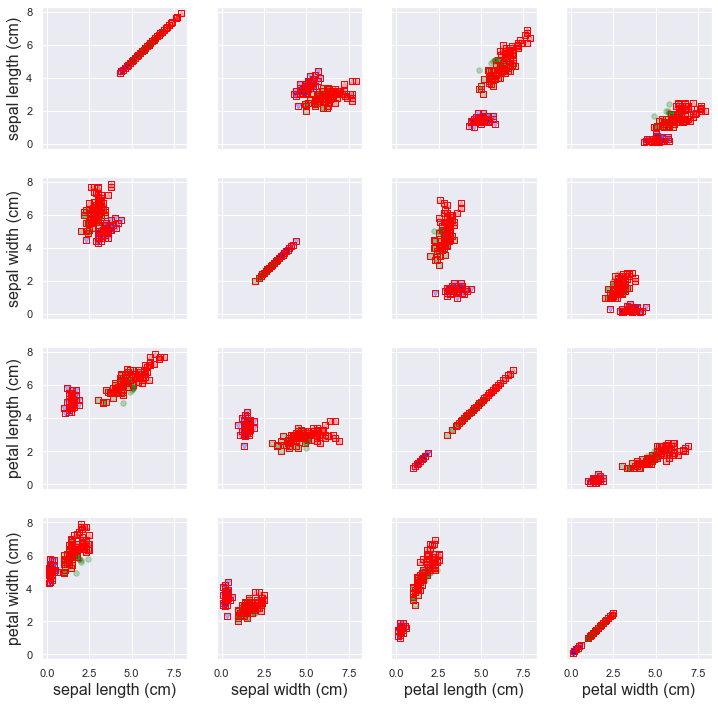

In [9]:
# grafico
N = X.shape[1]
#
fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)
colors = ["red", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask], s=30, marker=markers[p], 
                               color=colors[p], alpha=0.25)
        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n], s=30, marker="s", edgecolor="red",
                               facecolor=(1,1,1,0))
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)

In [10]:
from sklearn import metrics

# visualizar o reporte das metricas

#apresenta o quanto y e y_pred são parecidos
report = metrics.adjusted_mutual_info_score(y, y_pred)
print(report)

#homogeneity: indica que cada cluster contém apenas membros de uma única classe.
report = metrics.homogeneity_score(y, y_pred)
print(report)

#completeness: todos os membros de uma determinada classe são atribuídos ao mesmo cluster. 
report = metrics.completeness_score(y, y_pred)
print(report)

#os valores quanto mais próximo de 1 melhor.

0.7551191675800484
0.7514854021988338
0.7649861514489815


> O resultado do agrupamento das amostras do dataset íris na figura acima mostra que o agrupamento faz um bom trabalho em reconhecimento de amostras que pertencem a diferentes grupos.

#ELBOW Method (Método do Cotovelo) para determinar o número ótimo de clusters

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()
#we are usingh
df=pd.DataFrame(iris['data'])
print(df.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [18]:
distortions = []
NumMinClusters = 1
NumMaxCluster = 10
K = range(NumMinClusters,NumMaxCluster+1) #testa clusters de 1 a 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

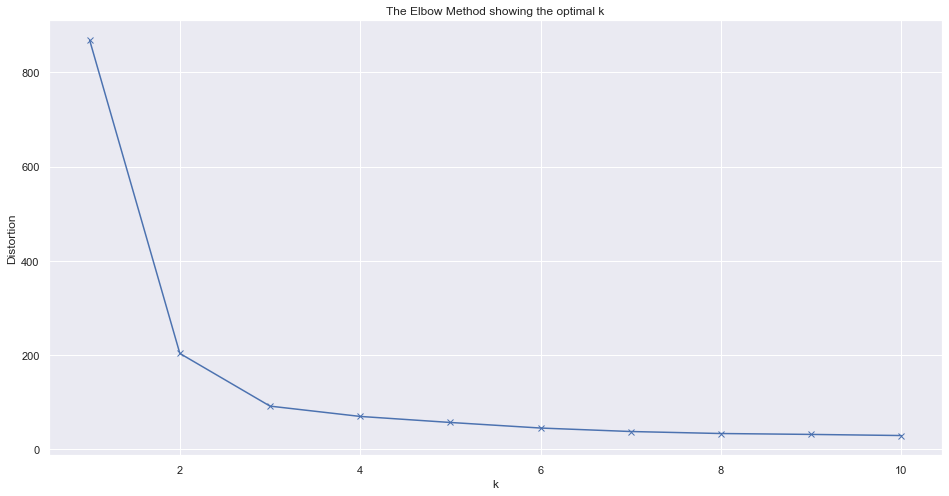

In [19]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
k=1
for d in distortions:
    print("Número de Clusters ",k,": distorção =",d)
    k=k+1

Cluster  1 : distorção = 868.4106
Cluster  2 : distorção = 203.44811645870473
Cluster  3 : distorção = 91.58488794567059
Cluster  4 : distorção = 69.69957142857143
Cluster  5 : distorção = 56.86563538072236
Cluster  6 : distorção = 45.058135380722355
Cluster  7 : distorção = 37.665295121545114
Cluster  8 : distorção = 33.413671654432534
Cluster  9 : distorção = 31.519464092924625
Cluster  10 : distorção = 29.140620734528625


Podemos observar que o “cotovelo” é o número 3 que é ótimo para este caso. Agora podemos executar um K-Means usando como n_clusters o número 3. 

In [47]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'K_Means')

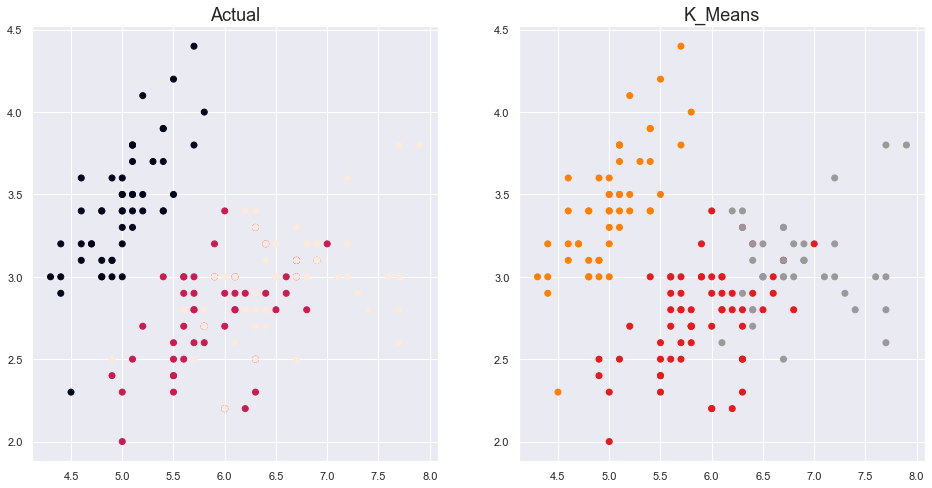

In [48]:
df['k_means']=kmeanModel.predict(df)
df['target']=iris['target']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

In [56]:
#mostra em qual cluster cada elemento está

i=0
for c in df['k_means']:
    print("Elemento ",i," está no cluster ",c)
    i=i+1
    

Elemento  0  está no cluster  1
Elemento  1  está no cluster  1
Elemento  2  está no cluster  1
Elemento  3  está no cluster  1
Elemento  4  está no cluster  1
Elemento  5  está no cluster  1
Elemento  6  está no cluster  1
Elemento  7  está no cluster  1
Elemento  8  está no cluster  1
Elemento  9  está no cluster  1
Elemento  10  está no cluster  1
Elemento  11  está no cluster  1
Elemento  12  está no cluster  1
Elemento  13  está no cluster  1
Elemento  14  está no cluster  1
Elemento  15  está no cluster  1
Elemento  16  está no cluster  1
Elemento  17  está no cluster  1
Elemento  18  está no cluster  1
Elemento  19  está no cluster  1
Elemento  20  está no cluster  1
Elemento  21  está no cluster  1
Elemento  22  está no cluster  1
Elemento  23  está no cluster  1
Elemento  24  está no cluster  1
Elemento  25  está no cluster  1
Elemento  26  está no cluster  1
Elemento  27  está no cluster  1
Elemento  28  está no cluster  1
Elemento  29  está no cluster  1
Elemento  30  está n

In [61]:
filename="plantasclusterizadas.csv"

df2=df.copy()

df2=df2.drop(columns=['target'])

df2.to_csv(filename, index=False)

------
Marcelo Lisboa &copy; 2021. mlisboa@uft.edu.br

In [33]:
#modelo de arquivo 
import pickle

# salva o modelo para o disco
filename = 'modelo_kmeans-k-3.sav'
pickle.dump(kmeanModel, open(filename, 'wb'))

In [34]:
#modelo de arquivo 
import pickle
#recupera o modelo salvo
filename = 'modelo_kmeans-k-3.sav'
ModeloKMeans = pickle.load(open(filename, 'rb'))

In [44]:
X_aval=[]

val=float(input('sepal length (cm):'))
X_aval.append(val)

val=float(input('sepal width (cm):'))
X_aval.append(val)

val=float(input('petal length (cm):'))
X_aval.append(val)

val=float(input('petal width (cm):'))
X_aval.append(val)

print(X_aval)

X_aval=np.array(X_aval)

X_aval=X_aval.reshape(1,len(X_aval))

X_aval=pd.DataFrame(X_aval)

sepal length (cm):8.4
sepal width (cm):8.4
petal length (cm):1.1
petal width (cm):1.1
[8.4, 8.4, 1.1, 1.1]


In [45]:
# visualizar resultados usando metodo predict (fit_predict)
y_pred = ModeloKMeans.predict(X_aval)

In [46]:
print("Essa planta com os dados fornecidos está no cluster=",y_pred)

Essa planta com os dados fornecidos está no cluster= [1]
